# **Fintech User Data**

Source: https://www.kaggle.com/datasets/niketdheeryan/fintech-users-data

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Projects Files/Fintech_user.csv')

data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [132]:
data.iloc[:,10:]

,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,96,0,0,5,1,1,1,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,285,0,0,9,1,0,0,0,1,2,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,74,0,0,26,1,0,0,0,1,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,81,0,0,2,1,1,1,0,1,2,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,1,0,0,0,1,1,1,0,1,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,98,0,0,0,1,1,1,0,1,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,58,0,0,2,1,1,1,1,0,0,...,0,0,0,0,Aries,1,0,27.0,0.90,1


In [133]:
# 27000 rows and 31 columns
data.shape

(27000, 31)

In [134]:
#Checking for Null values
data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [135]:
data['credit_score'] = data.credit_score.fillna(data.credit_score.mean())

In [193]:
data['rewards_earned'] = data['rewards_earned'].fillna(data['rewards_earned'].mean())

In [194]:
#Users should be unique. Are there duplicates?
data['user'].duplicated().sum() ##2259 duplicates

2259

In [195]:
#replacing NaN values in age column wiht average

data.age.fillna(int(data.age.mean()), inplace=True)

In [196]:
df = data.copy()

In [197]:
df = data.drop_duplicates('user')

df.shape

(24741, 31)

# **2. Analysis**

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24741 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     24741 non-null  int64  
 1   churn                    24741 non-null  int64  
 2   age                      24741 non-null  float64
 3   housing                  24741 non-null  object 
 4   credit_score             24741 non-null  float64
 5   deposits                 24741 non-null  int64  
 6   withdrawal               24741 non-null  int64  
 7   purchases_partners       24741 non-null  int64  
 8   purchases                24741 non-null  int64  
 9   cc_taken                 24741 non-null  int64  
 10  cc_recommended           24741 non-null  int64  
 11  cc_disliked              24741 non-null  int64  
 12  cc_liked                 24741 non-null  int64  
 13  cc_application_begin     24741 non-null  int64  
 14  app_downloaded        

<ipython-input-199-879d94e09aba>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


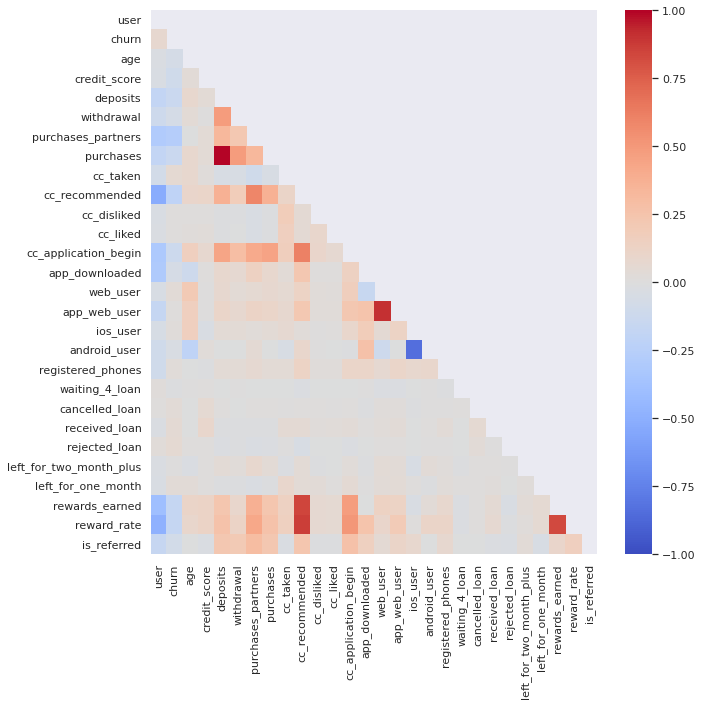

In [199]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr, vmin= -1, vmax= 1, cmap='coolwarm', mask=mask)


## The feature more higly correlated with making a purchase is the number of deposits. 

##The features most correlated with making deposits are purchases, cc_recommended, cc_application_begin.

##Although all not the highest correlated features they are actionable. May be worth sending users who fall within the categories of these features to be targeted with notification about rewards, features and the app. 

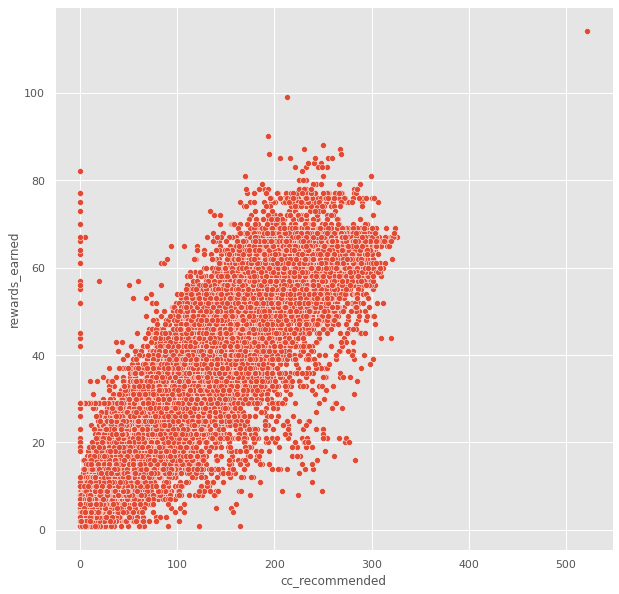

In [232]:
# strong correlation between 
sns.scatterplot(x='cc_recommended', y='rewards_earned', data=df)

<ipython-input-233-7731b3679f1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn_txt'] = df['churn'].replace([0,1], ['No Churn', 'Churned'])


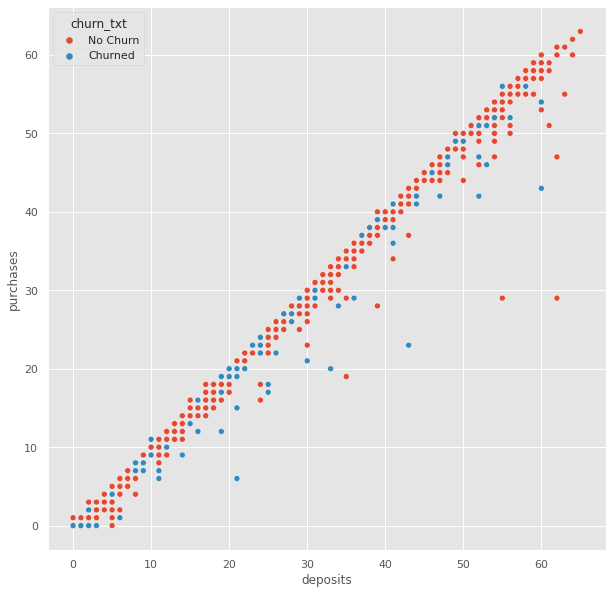

In [233]:
df['churn_txt'] = df['churn'].replace([0,1], ['No Churn', 'Churned']) 

sns.scatterplot(x='deposits', y='purchases', data=df, hue='churn_txt' )

# There is a very strong correlation between deposits and purchases but nothing to pinpoint what causes churn.

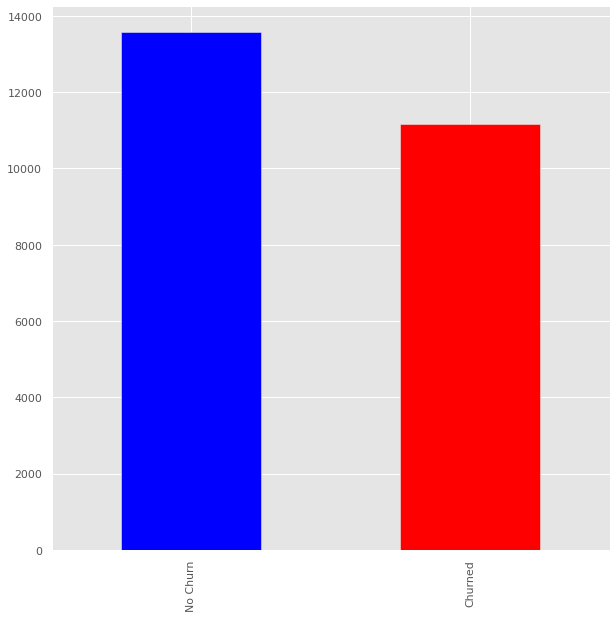

In [234]:
df['churn_txt'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.style.use('ggplot')

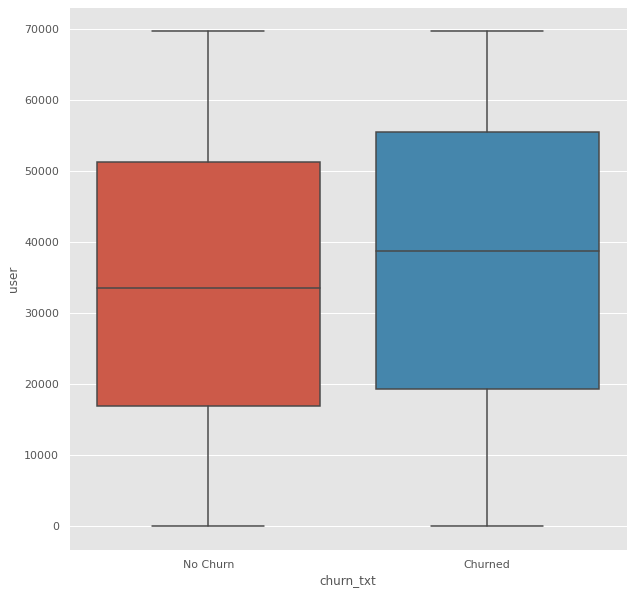

In [235]:
# df.groupby('churn_txt')['user'].plot(kind='bar', color=['blue', 'red'])
# plt.style.use('ggplot')


sns.boxplot(x = df['churn_txt'], y = df['user'])


In [236]:
df['churn_txt'].value_counts() * 100 / len(df)

No Churn    54.840144
Churned     45.159856
Name: churn_txt, dtype: float64

## 45% of the customers churned.

In [237]:
df[['user', 'credit_score', 'churn']].corr()

,user,credit_score,churn
user,1.000000,-0.036869,0.072283
credit_score,-0.036869,1.000000,-0.100976
churn,0.072283,-0.100976,1.000000


## Credit score has a negative correlation with churn meaning the higher the score the less likely to churn. It is a weak correlation but noted.

## User is strongly correlated with Churn however which is surprising. It could be that there are gorups of users who may be newer and this could mean that are skewing the results. Some time series data would be helpful here.

In [238]:
df[['age']].describe()

,age
count,24741.000000
mean,32.155653
std,9.943347
min,17.000000
25%,25.000000
50%,30.000000
75%,37.000000
max,91.000000


In [239]:
df[['age']].mode()

,age
0,26.0


In [240]:
df[['age']].median()

age    30.0
dtype: float64

In [241]:
df[['age']].isna().sum()

age    0
dtype: int64

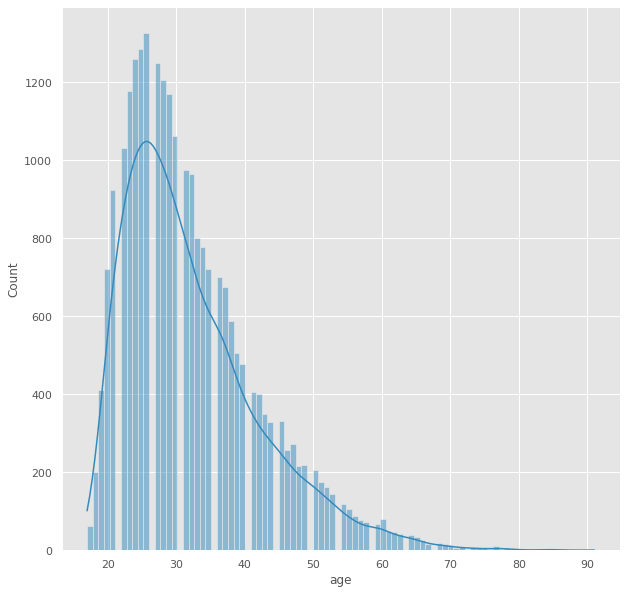

In [242]:
#distribution of age. Right skewed

sns.histplot(df.age, kde=True)
plt.style.use('ggplot')


In [243]:
df['housing'].value_counts()

na    12768
R     10015
O      1958
Name: housing, dtype: int64

In [244]:
df['housing'].value_counts() * 100 /len(df)

na    51.606645
R     40.479366
O      7.913989
Name: housing, dtype: float64

# Most users are between 20-30 years old

Text(0.5, 1.0, 'Housing Situation')

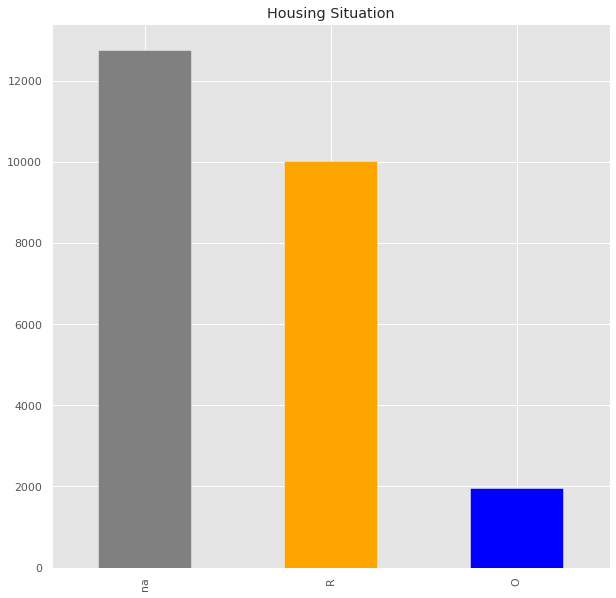

In [245]:
df['housing'].value_counts().plot(kind='bar', color=['grey', 'orange', 'blue'])
plt.title('Housing Situation')




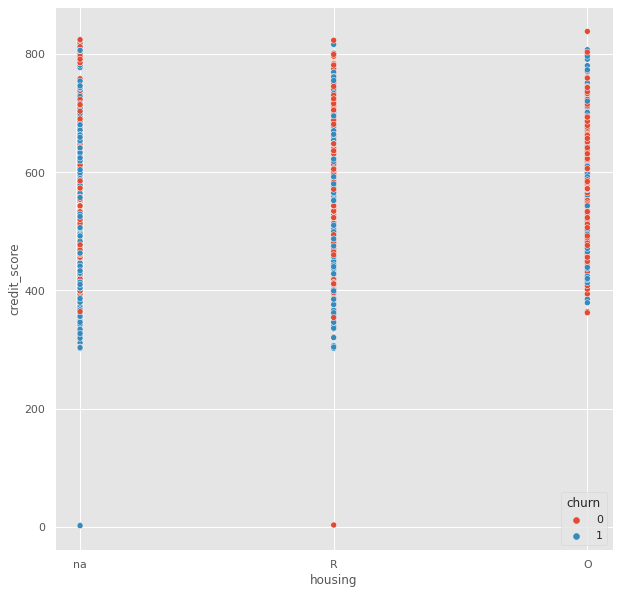

In [246]:
sns.scatterplot(x='housing', y='credit_score', data=df, hue='churn')

# Since 40% of users rent housing and only 8% own homes.

# We can see the people that own homes have a large percentage of churn amongst them; nearly 40%



# In order to target users more likely to be retained we should target renters. 

# 3. **Testing Features for Prediction:** Can we take the features we found to be most correlated and predict whether they result in purchases?



In [247]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [248]:
# Create binary data for purchase column

df['purchase_bin'] = np.where(df['purchases'] > 0, 1, 0)

df['purchase_bin'].value_counts()

X = df[['cc_recommended', 'cc_application_begin', 'deposits', 'is_referred', 'rewards_earned', 'reward_rate']]

y = df['purchase_bin']

<ipython-input-248-184a5eb96273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_bin'] = np.where(df['purchases'] > 0, 1, 0)


In [249]:
# Splitting trainign and test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [250]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [251]:
y_pred = log_reg.predict(x_test)

y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [252]:
confusion_matrix(y_test, y_pred) # Overall the model did well at predicting True Positive and True Negative correct guesses.

array([[5002,   33],
       [   1, 2387]])

In [255]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5035
           1       0.99      1.00      0.99      2388

    accuracy                           1.00      7423
   macro avg       0.99      1.00      0.99      7423
weighted avg       1.00      1.00      1.00      7423

